<a href="https://colab.research.google.com/github/sheethalkaran/FitPulse-Health-Anomaly-Detection-from-Fitness-Devices/blob/main/Milestone1/Milestone1_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [13]:
hr = pd.read_csv("/content/heartrate_seconds_merged.csv")
steps = pd.read_csv("/content/minuteStepsNarrow_merged.csv")
sleep = pd.read_csv("/content/sleepDay_merged.csv")

In [14]:
print(hr.head())

           Id                  Time  Value
0  2022484408  4/12/2016 7:21:00 AM     97
1  2022484408  4/12/2016 7:21:05 AM    102
2  2022484408  4/12/2016 7:21:10 AM    105
3  2022484408  4/12/2016 7:21:20 AM    103
4  2022484408  4/12/2016 7:21:25 AM    101


In [15]:
print(steps.head())

           Id         ActivityMinute  Steps
0  1503960366  4/12/2016 12:00:00 AM      0
1  1503960366  4/12/2016 12:01:00 AM      0
2  1503960366  4/12/2016 12:02:00 AM      0
3  1503960366  4/12/2016 12:03:00 AM      0
4  1503960366  4/12/2016 12:04:00 AM      0


In [16]:
print(sleep.head())

           Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0  1503960366  4/12/2016 12:00:00 AM                  1                 327   
1  1503960366  4/13/2016 12:00:00 AM                  2                 384   
2  1503960366  4/15/2016 12:00:00 AM                  1                 412   
3  1503960366  4/16/2016 12:00:00 AM                  2                 340   
4  1503960366  4/17/2016 12:00:00 AM                  1                 700   

   TotalTimeInBed  
0             346  
1             407  
2             442  
3             367  
4             712  


In [19]:
hr['DateTime'] = pd.to_datetime(hr['Time'], utc=True)
steps['DateTime'] = pd.to_datetime(
    steps['ActivityMinute'],
    format='%m/%d/%Y %I:%M:%S %p',
    utc=True
)
sleep['SleepDate'] = (
    pd.to_datetime(
        sleep['SleepDay'],
        format='%m/%d/%Y %I:%M:%S %p',
        utc=True
    )
    .dt.normalize()
)

In [22]:
print("Converted Timestamps:")
print(hr[['Time','DateTime']].head())

Converted Timestamps:
                   Time                  DateTime
0  4/12/2016 7:21:00 AM 2016-04-12 07:21:00+00:00
1  4/12/2016 7:21:05 AM 2016-04-12 07:21:05+00:00
2  4/12/2016 7:21:10 AM 2016-04-12 07:21:10+00:00
3  4/12/2016 7:21:20 AM 2016-04-12 07:21:20+00:00
4  4/12/2016 7:21:25 AM 2016-04-12 07:21:25+00:00


In [23]:
print(steps[['ActivityMinute','DateTime']].head())

          ActivityMinute                  DateTime
0  4/12/2016 12:00:00 AM 2016-04-12 00:00:00+00:00
1  4/12/2016 12:01:00 AM 2016-04-12 00:01:00+00:00
2  4/12/2016 12:02:00 AM 2016-04-12 00:02:00+00:00
3  4/12/2016 12:03:00 AM 2016-04-12 00:03:00+00:00
4  4/12/2016 12:04:00 AM 2016-04-12 00:04:00+00:00


In [24]:
print(sleep[['SleepDay','SleepDate']].head())

                SleepDay                 SleepDate
0  4/12/2016 12:00:00 AM 2016-04-12 00:00:00+00:00
1  4/13/2016 12:00:00 AM 2016-04-13 00:00:00+00:00
2  4/15/2016 12:00:00 AM 2016-04-15 00:00:00+00:00
3  4/16/2016 12:00:00 AM 2016-04-16 00:00:00+00:00
4  4/17/2016 12:00:00 AM 2016-04-17 00:00:00+00:00


In [25]:
hr_clean = hr.set_index('DateTime').resample('1min')['Value'].mean().ffill()
hr_clean = hr_clean.to_frame(name='HeartRate')
print("Heart Rate (1-Minute):")
print(hr_clean.head())

Heart Rate (1-Minute):
                           HeartRate
DateTime                            
2016-04-12 00:00:00+00:00  61.475000
2016-04-12 00:01:00+00:00  64.024390
2016-04-12 00:02:00+00:00  64.157895
2016-04-12 00:03:00+00:00  64.083333
2016-04-12 00:04:00+00:00  63.888889


In [26]:
steps_clean = steps.set_index('DateTime').resample('1min')['Steps'].sum().fillna(0)
print("Steps (1-Minute):")
print(steps_clean.head())

Steps (1-Minute):
DateTime
2016-04-12 00:00:00+00:00    159
2016-04-12 00:01:00+00:00    142
2016-04-12 00:02:00+00:00     48
2016-04-12 00:03:00+00:00     66
2016-04-12 00:04:00+00:00     63
Freq: min, Name: Steps, dtype: int64


In [27]:
final_df = pd.merge(hr_clean, steps_clean, left_index=True, right_index=True, how='inner')
final_df = final_df.sort_index()
print("Merged HR & Steps:")
print(final_df.head())

Merged HR & Steps:
                           HeartRate  Steps
DateTime                                   
2016-04-12 00:00:00+00:00  61.475000    159
2016-04-12 00:01:00+00:00  64.024390    142
2016-04-12 00:02:00+00:00  64.157895     48
2016-04-12 00:03:00+00:00  64.083333     66
2016-04-12 00:04:00+00:00  63.888889     63


In [28]:
sleep_clean = sleep[['Id', 'SleepDate', 'TotalMinutesAsleep']]
print(sleep_clean.head())

           Id                 SleepDate  TotalMinutesAsleep
0  1503960366 2016-04-12 00:00:00+00:00                 327
1  1503960366 2016-04-13 00:00:00+00:00                 384
2  1503960366 2016-04-15 00:00:00+00:00                 412
3  1503960366 2016-04-16 00:00:00+00:00                 340
4  1503960366 2016-04-17 00:00:00+00:00                 700


In [29]:
final_df = final_df.reset_index()
final_df['Date'] = final_df['DateTime'].dt.normalize()
final_df = pd.merge(final_df, sleep_clean, left_on='Date', right_on='SleepDate', how='left')
final_df = final_df.drop(columns=['Date', 'SleepDate'])
final_df = final_df.set_index('DateTime')
print("Final Dataset with Sleep Info:")
print(final_df.head())

Final Dataset with Sleep Info:
                           HeartRate  Steps          Id  TotalMinutesAsleep
DateTime                                                                   
2016-04-12 00:00:00+00:00     61.475    159  1503960366                 327
2016-04-12 00:00:00+00:00     61.475    159  1927972279                 750
2016-04-12 00:00:00+00:00     61.475    159  2026352035                 503
2016-04-12 00:00:00+00:00     61.475    159  3977333714                 274
2016-04-12 00:00:00+00:00     61.475    159  4020332650                 501


In [30]:
final_df.to_csv('/content/drive/MyDrive/clean_fitness_data.csv')
print("Clean dataset saved to Google Drive.")

Clean dataset saved to Google Drive.


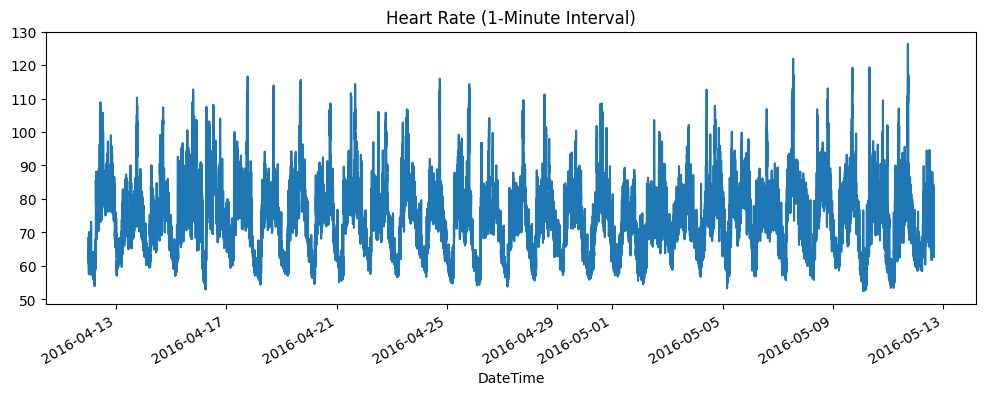

In [31]:
final_df['HeartRate'].plot(figsize=(12,4))
plt.title("Heart Rate (1-Minute Interval)")
plt.show()